In [1]:
import sys; sys.path.append("../")
import torch
import matplotlib.pyplot as plt
import cv2
import torch.nn.functional as F
from feature_extractor import FeatureExtractor
import numpy as np
import time
from cascade import CascadeClassifier
import os
from PIL import Image
from typing import List, Tuple
import pickle as pkl
from detect_face import find_face

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

In [3]:
trained_parent = '../hFeatures6/'

In [5]:
# feature_extractor = FeatureExtractor(shape=(24,24), 
#                                      percentile=100,
#                                      all_features_file=trained_parent + "all_features.npz",
#                                      selected_features_file=trained_parent + "selected_features.npz",
#                                      labels_file=trained_parent + "labels.npy",
#                                      indecies_file=trained_parent + "indecies.npy",
#                                      verbose=False,
#                                      batch_size=500)

In [5]:
# cascadeClassifier = pkl.load(open(trained_parent + "cascadeClassifier.pkl", "rb"))

In [4]:
import glob
import random

# FF++ Cropped
# parent = '../../SBI2/data/FaceForensics++/original_sequences/youtube/c23/frames/'
# all_images_names = glob.glob(parent + '*/*.png')

# FDDB
parent = '../../FDDB/originalPics/'
all_images_names = glob.glob(parent + '*/*/*/*/*.jpg')
# all_images_names = sorted(all_images_names)

# LFW
# parent = '../../lfw_all/'
# all_images_names = os.listdir(parent)
# all_images_names = [parent + name for name in all_images_names]

print(len(all_images_names))
random.shuffle(all_images_names)
print(all_images_names[0])

28204
../../FDDB/originalPics/2003/01/13/big/img_717.jpg


In [5]:
show_images = list(range(0, 5))
rectangles_only = True
# resize_to = (100, 100)
random.shuffle(all_images_names)

In [6]:
import joblib
face_detector = joblib.load(trained_parent+'faceDetector2.joblib')

In [22]:
# all_classifiers = face_detector.classifier.strong_classifiers[0].weak_classifiers
# face_detector.classifier.strong_classifiers[0].weak_classifiers = all_classifiers[:80]

In [44]:
# highest_indices = np.argsort(face_detector.classifier.strong_classifiers[0].alphas)[::-1]
# highest_indices = highest_indices[:100]
# face_detector.classifier.strong_classifiers[0].weak_classifiers = [all_classifiers[i] for i in highest_indices]
# face_detector.classifier.strong_classifiers[0].alphas = [face_detector.classifier.strong_classifiers[0].alphas[i] for i in highest_indices]

In [23]:
# face_detector.classifier.strong_classifiers[0].θ = np.sum(face_detector.classifier.strong_classifiers[0].alphas) / 2

In [7]:
old_θ = face_detector.classifier.strong_classifiers[0].θ
old_θ

45.2803960835052

In [65]:
face_detector.classifier.strong_classifiers[0].θ = 50

In [7]:
def IOU(rect1, rect2):
    """
    rect: (x0, y0, x1, y1)
    """
    x1_1, y1_1, x2_1, y2_1 = rect1
    x1_2, y1_2, x2_2, y2_2 = rect2
    x1 = max(x1_1, x1_2)
    y1 = max(y1_1, y1_2)
    x2 = min(x2_1, x2_2)
    y2 = min(y2_1, y2_2)

    intersection = max(0, x2 - x1) * max(0, y2 - y1)
    union = (x2_1 - x1_1) * (y2_1 - y1_1) + (x2_2 - x1_2) * (y2_2 - y1_2) - intersection
    return intersection / union


In [8]:
def IOU2D(rect1, rects):
    """
    rect: (x0, y0, x1, y1)
    """
    x1_1, y1_1, x2_1, y2_1 = rect1
    x1_2, y1_2, x2_2, y2_2 = rects[:, 0], rects[:, 1], rects[:, 2], rects[:, 3]
    x1 = np.maximum(x1_1, x1_2)
    y1 = np.maximum(y1_1, y1_2)
    x2 = np.minimum(x2_1, x2_2)
    y2 = np.minimum(y2_1, y2_2)

    intersection = np.maximum(0, x2 - x1) * np.maximum(0, y2 - y1)
    union = (x2_1 - x1_1) * (y2_1 - y1_1) + (x2_2 - x1_2) * (y2_2 - y1_2) - intersection
    return intersection / union

RGB
(362, 410)
{'Getting Subwindows': 0.3542759418487549, 'Resizing Subwindows': 0.4801511764526367, 'Normalize': 2.0503997802734375e-05, 'Extracting Features': 0.9289567470550537, 'Classifying': 0.3921637535095215, 'total': 2.1555681228637695}


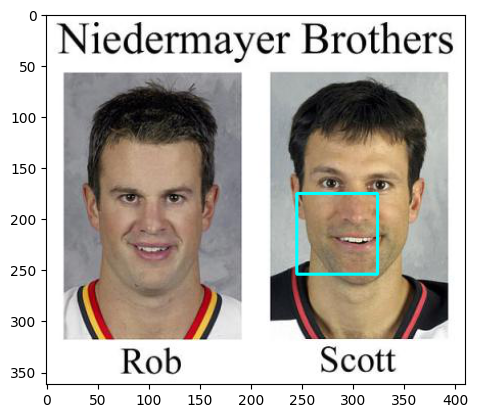

61.59902811300442
RGB
(318, 410)
{'Getting Subwindows': 0.25654053688049316, 'Resizing Subwindows': 0.32392144203186035, 'Normalize': 2.2172927856445312e-05, 'Extracting Features': 0.7833576202392578, 'Classifying': 0.3326294422149658, 'total': 1.6964712142944336}


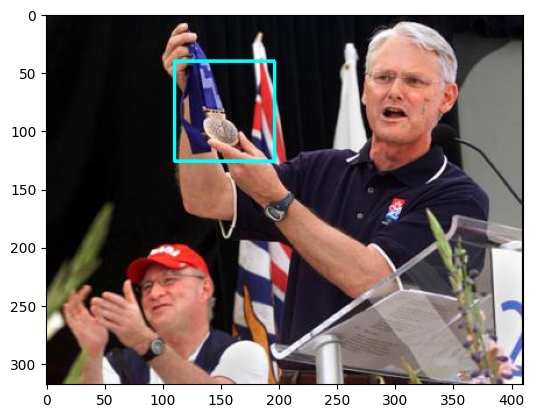

62.2845181473371
RGB
(410, 384)
{'Getting Subwindows': 0.38446736335754395, 'Resizing Subwindows': 0.457078218460083, 'Normalize': 2.002716064453125e-05, 'Extracting Features': 0.9917693138122559, 'Classifying': 0.3992190361022949, 'total': 2.2325539588928223}


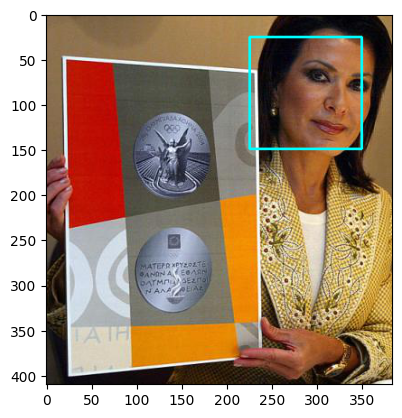

60.169724497419836
RGB
(305, 409)
{'Getting Subwindows': 0.2506401538848877, 'Resizing Subwindows': 0.31223082542419434, 'Normalize': 2.09808349609375e-05, 'Extracting Features': 0.7446436882019043, 'Classifying': 0.31356239318847656, 'total': 1.6210980415344238}


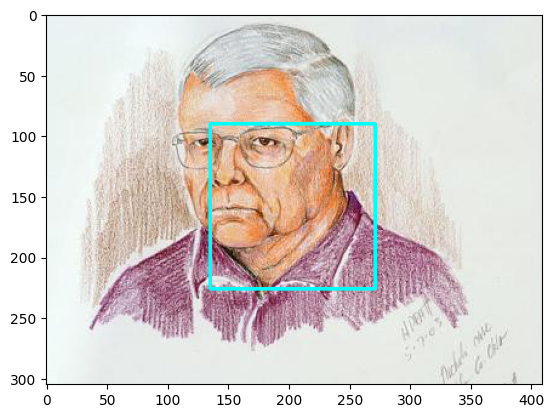

57.285991198804204
RGB
(450, 327)
{'Getting Subwindows': 0.3683207035064697, 'Resizing Subwindows': 0.41710543632507324, 'Normalize': 2.1457672119140625e-05, 'Extracting Features': 0.9087083339691162, 'Classifying': 0.3773074150085449, 'total': 2.0714633464813232}


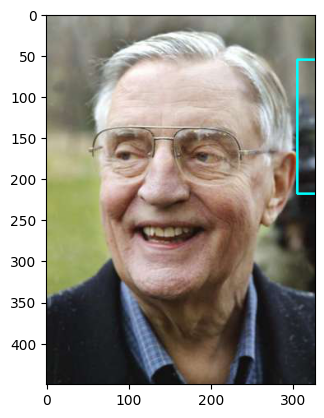

60.048007419197155


In [16]:
for i in show_images:
  # >>>> Read image <<<<
  img = Image.open(all_images_names[i])
  print(img.mode)
  img = np.array(img)
  # img=  cv2.resize(img, (250,250))
  org_sh = img.shape
  if not rectangles_only:
    plt.imshow(img)
    plt.show()
  # get subwindows
  img2 = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  print(img2.shape)
  # ssshape=   (img2.shape[1] // 3, img2.shape[0] // 3)
  # img2 = cv2.resize(img2, ssshape)
  # print(img2.shape)
  

  # >>>> Normalize image <<<<
  # normalize image
  # img2 = (img2 - img2.mean()) / img2.std()
  # img2 = cv2.resize(img, resize_to)
  # print(img2.shape)

  # img2 = cv2.normalize(img2, None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
  # resize image
  # img2 = cv2.resize(img2, (570, 380))

  # show image
  if not rectangles_only:
    plt.imshow(img2, cmap='gray')
    plt.show()

  # +++++++++++++++++++++
  # find face
  # >>>> Find face <<<<
  face_coordinates, region_max_conf, max_conf , timing= face_detector.find_face(img2)
                  # face_detector.find_face(img2, \
                  #             cascadeClassifier, \
                  #             feature_extractor, \
                  #             window_size=(19, 19), \
                  #             scale_dist=1.1, \
                  #             max_size=300, \
                  #             stride=5, \
                  #             device=device, \
                  #             verbose=False,
                  #             report_time=True)
  print(timing)
  # region_max_conf *= img.shape[0] / resize_to[0]

  # >>>> Draw rectangles with max confidence <<<<
  # amx confidence
  # tmp_img = cv2.resize(img, ssshape)
  tmp_img = img.copy()
  # x1, y1, x2, y2 = region_max_conf
  y1, x1, y2, x2 = region_max_conf
  cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 255), 2)
  # tmp_img = tmp_img[x1:x2, y1:y2]
  plt.imshow(tmp_img)
  plt.show()

  print(max_conf)
  # ++++++++++++++++++++
  # rectangles 
  # >>>> Draw rectangles <<<<
  # tmp_img = cv2.resize(img, ssshape)
  # all_rectanles = []
  # print(type(face_coordinates))
  # for el in face_coordinates:
  #   for x1, y1, x2, y2 in el:
  #     all_rectanles.append((x1, y1, x2, y2))

  # all_rectanles = np.array(all_rectanles)
  # print(all_rectanles.shape)
    
  # tmp_img = img.copy()
  # cnt = 0
  # for face_coordinate in face_coordinates:
  #     for x1, y1, x2, y2 in face_coordinate:
  #         # draw if IOU is high
  #         if IOU((x1, y1, x2, y2), region_max_conf) > 0.85:
  #           cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 255), 2)
  #           cnt += 1
  #         # plt.imshow(tmp_img)
  #         # plt.show()
  # print(cnt)
  # # if not rectangles_only:          
  # plt.imshow(tmp_img)
  # plt.show()

  # # +++++++++++++++++++++
  # # IOU2D > 0.85 -> draw rectangle
  # # >>>> Draw rectangles <<<<
  # # tmp_img = cv2.resize(img, ssshape)
  # tmp_img = img.copy()
  # cnt = 0
  # for x1, y1, x2, y2 in all_rectanles:
  #     # draw if more than 10 rectangles intersect with it with IOU > 0.85
  #     if np.sum(IOU2D((x1, y1, x2, y2), all_rectanles) > 0.85) > 5:
  #       cv2.rectangle(tmp_img, (x1, y1), (x2, y2), (0, 255, 255), 2)
  #       cnt += 1
  #     # plt.imshow(tmp_img)
  #     # plt.show()
  # print(cnt)
  # # if not rectangles_only:
  # plt.imshow(tmp_img)
  # plt.show()
  